<a href="https://colab.research.google.com/github/adityayadav4507/Foundation_of_ML/blob/main/31.B_NN_by_class_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import numpy as np


In [143]:
# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x): # need bec of back propogation perform
  return sigmoid(x)/(1-sigmoid(x))

def ReLU(x):
  return np.maximum(0,x)

def relu_derivative(x):
  return (x>0).astype(float)




In [144]:
# class of NN

class simple_NN:
  def __init__(self,input_size=2,hidden_size=2,lr_rate=0.1,epochs=100):
    # initialize weights and biases

    self.w1=np.random.randn(input_size,hidden_size)
    self.b1=np.zeros((1,hidden_size))
    self.w2=np.random.randn(hidden_size,1)
    self.b2=np.zeros((1,1))
    self.lr_rate=lr_rate
    self.epochs=epochs


  def forward(self,X):
    # forward pass
    self.z1=np.dot(X,self.w1)+self.b1
    self.a1=ReLU(self.z1)
    self.z2=np.dot(self.a1,self.w2)+self.b2
    self.a2=sigmoid(self.z2)
    return self.a2

  def loss(self,y_pred,y_true):
    # calculate loss binary-cross entropy
    return -np.mean(y_true * np.log(y_pred+1e-8) + (1 - y_true) * np.log(1 - y_pred+1e-8))


  def backward(self,X,y_pred,y_true):
    # back pass
    m=X.shape[0]
    dz2=y_pred-y_true
    dw2=np.dot(self.a1.T,dz2)/m
    db2=np.sum(dz2,axis=0,keepdims=True)/m

    dz1=np.dot(dz2,self.w2.T)*relu_derivative(self.z1)
    dw1=np.dot(X.T,dz1)/m
    db1=np.sum(dz1,axis=0,keepdims=True)/m
    # update weights and biases

    self.w1-=self.lr_rate*dw1
    self.b1-=self.lr_rate*db1
    self.w2-=self.lr_rate*dw2
    self.b2-=self.lr_rate*db2

  def fit(self,X,y):
    for i in range(self.epochs):
      y_pred=self.forward(X)    # forward calculate y predicted value
      loss=self.loss(y_pred,y)
      self.backward(X,y_pred,y)

      if i % 10==0:
        print(f" i={i} ,the loss ={loss}")


  def predict(self,X):
    p=self.forward(X)
    return (p>0.5).astype(int)





In [145]:
# create dataset
np.random.seed(0)
X=np.random.randn(100,2)
y=(X[:,1]>X[:,0]).astype(int).reshape(-1,1) # 1 if y>x else 0

# X[:,1]== 2nd column access X[:,0] 1st column element  access
# [1,2] --> true =1
# [3,2] -->  false=0
# y=[1,0] output

# initialize and train model
nn=simple_NN(lr_rate=0.1,epochs=100)
nn.fit(X,y)

# predict on few point

test_point=np.array([[0.3,0.5],[0.1,0.7],[0.3,0.8],[0.0,0.1]])
pred=nn.predict(test_point)
print("predict = ",pred)

 i=0 ,the loss =0.7879969976028505
 i=10 ,the loss =0.549133073372183
 i=20 ,the loss =0.48883005602901847
 i=30 ,the loss =0.442269463544513
 i=40 ,the loss =0.39913072693058743
 i=50 ,the loss =0.3583043056978614
 i=60 ,the loss =0.31609862339063766
 i=70 ,the loss =0.27787682674037073
 i=80 ,the loss =0.24961952838142804
 i=90 ,the loss =0.22281298675187108
predict =  [[1]
 [1]
 [1]
 [1]]


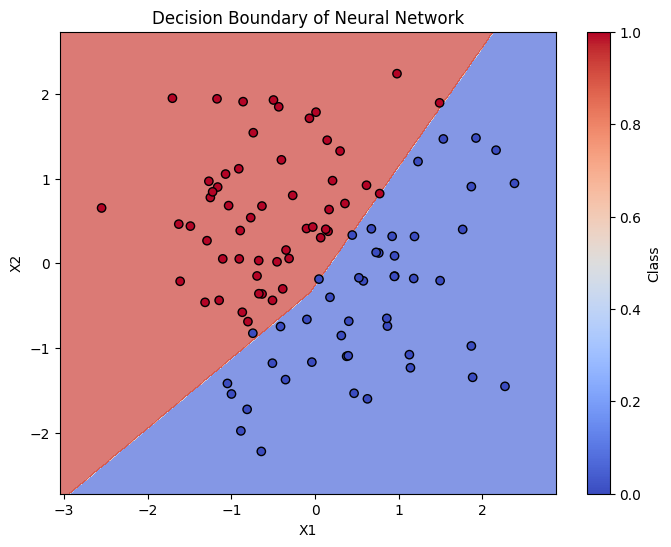

In [146]:
import matplotlib.pyplot as plt

# Create a grid of points covering the input space
h = 0.01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Flatten the grid and predict class for each point
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = nn.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.7)  # decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Decision Boundary of Neural Network")
plt.xlabel("X1")
plt.ylabel("X2")
plt.colorbar(label="Class")
plt.show()
